In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import glob
import os
%matplotlib inline

In [3]:
os.getcwd()

'/Users/annalisasheehan/Documents/PhD/Costa Rica/Arduino_Data'

## Read in PM dataset which contains calibration data 

In [2]:
Arduino2 = pd.read_csv("After Calibration/cr_sensor_2_calib.txt",delimiter=',', 
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds', 'PM1', 'PM2.5', 'PM10', 
                              'Temp', 'Pressure', 'Humidity', 'VOC'],)

In [3]:
Arduino2

,Year,Month,Day,Hour,Minute,Seconds,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
0,2019,3,11,10,59,48,0,0,0,22.84,1025.46,27.46,0.00
1,2019,3,11,11,0,15,0,1,1,23.09,1025.52,29.30,0.00
2,2019,3,11,11,0,21,0,1,1,23.12,1025.50,30.93,78.11
3,2019,3,11,11,0,26,0,2,2,23.18,1025.80,32.11,83.73
4,2019,3,11,11,0,31,0,2,2,23.26,1025.74,32.51,88.13
5,2019,3,11,11,0,37,0,1,1,23.36,1025.68,31.66,92.92
6,2019,3,11,11,0,42,0,0,0,23.46,1025.52,30.25,95.17
7,2019,3,11,11,0,47,0,0,0,23.55,1025.52,29.89,96.15
8,2019,3,11,11,0,52,0,0,0,23.63,1025.48,29.95,96.26
9,2019,3,11,11,0,57,0,0,0,23.71,1025.50,30.07,94.63


In [4]:
A2_mean = Arduino2.groupby(['Year','Month','Day', 'Hour', 'Minute'], as_index=False).mean()

In [5]:
A2_mean

,Year,Month,Day,Hour,Minute,Seconds,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
0,1919,1,4,12,28,23.000000,8.000000,10.000000,11.000000,17.950000,8.888700e+02,82.760000,74.360000
1,2019,3,11,10,59,48.000000,0.000000,0.000000,0.000000,22.840000,1.025460e+03,27.460000,0.000000
2,2019,3,11,11,0,36.444444,0.000000,0.777778,0.777778,23.373333,1.025584e+03,30.741111,80.566667
3,2019,3,11,11,1,30.666667,0.000000,0.000000,0.000000,24.040833,1.025442e+03,30.068333,87.495833
4,2019,3,11,11,2,29.909091,0.000000,0.000000,0.000000,24.345455,1.025475e+03,29.716364,80.065455
5,2019,3,11,11,3,29.166667,0.000000,0.000000,0.000000,24.495833,1.025510e+03,29.517500,77.164167
6,2019,3,11,11,4,31.000000,0.000000,0.000000,0.000000,24.686667,1.025502e+03,29.335000,75.512500
7,2019,3,11,11,5,30.272727,0.000000,0.000000,0.000000,24.861818,1.025495e+03,29.319091,75.458182
8,2019,3,11,11,6,29.500000,0.000000,0.000000,0.000000,24.946667,1.025498e+03,28.942500,97.027500
9,2019,3,11,11,7,28.727273,0.000000,0.363636,0.363636,24.602727,1.025462e+03,26.562727,119.379091


In [6]:
A2_mean = A2_mean.rename(columns={'PM1':'A2_PM1','PM2.5':'A2_PM2.5',
                                  'PM10':'A2_PM10','Temp':'A2_Temp',
                                  'Pressure':'A2_Pressure','Humidity':'A2_Humidity',
                                  'VOC':'A2_VOC'})

## Read in data which stopped working on the 16/3/2019

In [7]:
Arduino3_p = pd.read_csv("cr_sensor_03.csv")

In [8]:
#Arduino3_p = pd.read_csv('cr_sensor_03.csv',delimiter=',',
                #        names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','PM1','PM2.5','PM10'])

In [9]:
Arduino3_p

,Year,date.time,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10
0,2019,16/03/2019 04:09,3,16,4,9,17,0,0,0
1,2019,16/03/2019 04:09,3,16,4,9,23,0,0,0
2,2019,16/03/2019 04:09,3,16,4,9,30,0,0,0
3,2019,16/03/2019 04:09,3,16,4,9,36,0,0,0
4,2019,16/03/2019 04:09,3,16,4,9,42,0,0,0
5,2019,16/03/2019 04:09,3,16,4,9,48,0,0,0
6,2019,16/03/2019 04:09,3,16,4,9,54,7,10,10
7,2019,16/03/2019 04:09,3,16,4,9,59,7,11,12
8,2019,16/03/2019 04:10,3,16,4,10,5,7,12,13
9,2019,16/03/2019 04:10,3,16,4,10,10,7,13,14


In [10]:
A3_mean = Arduino3_p.groupby(['Year','Month','Day', 'Hour', 'Minute'], as_index=False).mean()

In [11]:
A3_mean

,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10
0,2019,3,16,4,9,38.625000,1.750000,2.625000,2.750000
1,2019,3,16,4,10,30.454545,6.363636,9.636364,10.181818
2,2019,3,16,4,11,34.555556,6.222222,10.444444,10.888889
3,2019,3,16,4,12,28.916667,7.166667,10.500000,11.083333
4,2019,3,16,4,13,20.375000,7.375000,11.625000,12.750000


In [12]:
A3_mean = A3_mean.rename(columns={'PM1':'A3_PM1','PM2.5':'A3_PM2.5',
                                  'PM10':'A3_PM10'})

In [14]:
## Left join didn't work because both monitors did not collect data at the same time/day
# Test = pd.merge(A2_mean, A3_mean, how = 'left', left_on=['Year', 'Month', 'Day', 'Hour', 'Minute'], right_on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [15]:
# Outer join because of different dates and times of arduino data 
A2_A3 = pd.merge(A2_mean, A3_mean, how = 'outer', left_on=['Year', 'Month', 'Day', 'Hour', 'Minute'], right_on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [16]:
A2_A3

,Year,Month,Day,Hour,Minute,Seconds,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,A2_Humidity,A2_VOC,Second,A3_PM1,A3_PM2.5,A3_PM10
0,1919,1,4,12,28,23.000000,8.000000,10.000000,11.000000,17.950000,8.888700e+02,82.760000,74.360000,NaN,NaN,NaN,NaN
1,2019,3,11,10,59,48.000000,0.000000,0.000000,0.000000,22.840000,1.025460e+03,27.460000,0.000000,NaN,NaN,NaN,NaN
2,2019,3,11,11,0,36.444444,0.000000,0.777778,0.777778,23.373333,1.025584e+03,30.741111,80.566667,NaN,NaN,NaN,NaN
3,2019,3,11,11,1,30.666667,0.000000,0.000000,0.000000,24.040833,1.025442e+03,30.068333,87.495833,NaN,NaN,NaN,NaN
4,2019,3,11,11,2,29.909091,0.000000,0.000000,0.000000,24.345455,1.025475e+03,29.716364,80.065455,NaN,NaN,NaN,NaN
5,2019,3,11,11,3,29.166667,0.000000,0.000000,0.000000,24.495833,1.025510e+03,29.517500,77.164167,NaN,NaN,NaN,NaN
6,2019,3,11,11,4,31.000000,0.000000,0.000000,0.000000,24.686667,1.025502e+03,29.335000,75.512500,NaN,NaN,NaN,NaN
7,2019,3,11,11,5,30.272727,0.000000,0.000000,0.000000,24.861818,1.025495e+03,29.319091,75.458182,NaN,NaN,NaN,NaN
8,2019,3,11,11,6,29.500000,0.000000,0.000000,0.000000,24.946667,1.025498e+03,28.942500,97.027500,NaN,NaN,NaN,NaN
9,2019,3,11,11,7,28.727273,0.000000,0.363636,0.363636,24.602727,1.025462e+03,26.562727,119.379091,NaN,NaN,NaN,NaN


In [ ]:
#list(A2_mean.index.values)

In [19]:
Arduino4_p = pd.read_csv("cr_sensor_04.csv")

In [20]:
Arduino4_p

,Year,date.time,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
0,2019,11/03/2019 11:58,3,11,11,58,31,0,0,0,22.54,1026.47,27.32,0.00
1,2019,11/03/2019 11:58,3,11,11,58,36,0,0,0,22.55,1026.45,27.21,16.02
2,2019,11/03/2019 11:58,3,11,11,58,41,0,0,0,22.57,1026.47,27.08,21.54
3,2019,11/03/2019 11:58,3,11,11,58,46,0,0,0,22.59,1026.47,26.96,28.32
4,2019,11/03/2019 11:58,3,11,11,58,51,0,0,0,22.61,1026.47,26.87,35.17
5,2019,11/03/2019 11:58,3,11,11,58,56,0,0,0,22.63,1026.47,26.93,41.71
6,2019,11/03/2019 11:59,3,11,11,59,1,0,0,0,22.65,1026.49,26.98,47.52
7,2019,11/03/2019 11:59,3,11,11,59,6,0,0,0,22.67,1026.51,26.89,53.27
8,2019,11/03/2019 11:59,3,11,11,59,11,0,0,0,22.68,1026.53,26.80,58.80
9,2019,11/03/2019 11:59,3,11,11,59,16,0,0,0,22.70,1026.53,26.71,63.15


In [21]:
list(Arduino4_p)

['Year',
 'date.time',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second',
 'PM1',
 'PM2.5',
 'PM10',
 'Temp',
 'Pressure',
 'Humidity',
 'VOC']

In [22]:
Arduino4_p = Arduino4_p[['Year','Month','Day','Hour','Minute','Second','PM1','PM2.5',
                         'PM10','Temp','Pressure','Humidity','VOC']]

In [23]:
A4_mean = Arduino4_p.groupby(['Year','Month','Day', 'Hour', 'Minute'], as_index=False).mean()

In [24]:
A4_mean

,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
0,2019,3,11,11,58,43.500000,0.000000,0.000000,0.000000,22.581667,1026.466667,27.061667,23.793333
1,2019,3,11,11,59,18.142857,0.000000,0.571429,0.571429,22.685714,1026.530000,27.057143,51.618571
2,2019,3,11,12,18,44.600000,0.000000,3.400000,3.400000,21.846000,1026.582000,26.516000,29.354000
3,2019,3,11,12,19,28.750000,0.000000,0.083333,0.416667,21.979167,1026.575000,27.462500,80.528333
4,2019,3,11,12,20,30.583333,0.083333,0.583333,1.083333,22.301667,1026.376667,28.715833,111.470000
5,2019,3,11,12,21,29.818182,1.818182,2.909091,4.636364,21.161818,1025.698182,25.670909,138.487273
6,2019,3,11,12,22,29.916667,3.833333,8.166667,10.250000,15.452500,1025.788333,28.735833,163.750000
7,2019,3,11,12,23,29.454545,1.454545,3.000000,5.636364,13.702727,1026.130000,37.089091,168.917273
8,2019,3,11,12,24,26.181818,0.000000,0.000000,0.181818,17.317273,1026.684545,36.293636,164.430909
9,2019,3,13,13,12,29.000000,0.000000,2.000000,2.000000,23.610000,889.450000,55.480000,0.000000


In [25]:
A4_mean = A4_mean.rename(columns={'PM1':'A4_PM1','PM2.5':'A4_PM2.5',
                                  'PM10':'A4_PM10','Temp':'A4_Temp',
                                  'Pressure':'A4_Pressure','Humidity':'A4_Humidity',
                                  'VOC':'A4_VOC'})

In [26]:
A2_A3_A4 = pd.merge(A2_A3, A4_mean, how = 'outer', left_on=['Year', 'Month', 'Day', 'Hour', 'Minute'], right_on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [27]:
PM_sensors = A2_mean.join(A3_mean, on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [28]:
A2_A3_A4

,Year,Month,Day,Hour,Minute,Seconds,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,...,A3_PM2.5,A3_PM10,Second_y,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC
0,1919,1,4,12,28,23.000000,8.000000,10.000000,11.000000,17.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,11,10,59,48.000000,0.000000,0.000000,0.000000,22.840000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,11,11,0,36.444444,0.000000,0.777778,0.777778,23.373333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,11,11,1,30.666667,0.000000,0.000000,0.000000,24.040833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,11,11,2,29.909091,0.000000,0.000000,0.000000,24.345455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,3,11,11,3,29.166667,0.000000,0.000000,0.000000,24.495833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019,3,11,11,4,31.000000,0.000000,0.000000,0.000000,24.686667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,3,11,11,5,30.272727,0.000000,0.000000,0.000000,24.861818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019,3,11,11,6,29.500000,0.000000,0.000000,0.000000,24.946667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019,3,11,11,7,28.727273,0.000000,0.363636,0.363636,24.602727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Error checking 
A2_A3_A4 = A2_A3_A4[A2_A3_A4.Hour <24]
A2_A3_A4 = A2_A3_A4[A2_A3_A4.Year >2018]

In [30]:
A2_A3_A4['Datetime']  = (pd.to_datetime(A2_A3_A4['Year'].astype(str) + '-' +
                                  A2_A3_A4['Month'].astype(str) + '-' +
                                  A2_A3_A4['Day'].astype(str) + ' ' +
                                  A2_A3_A4['Hour'].astype(str)+ ':'+
                                        A2_A3_A4['Minute'].astype(str)))

In [31]:
# Order by date
A2_A3_A4 = A2_A3_A4.sort_values(['Datetime'])

In [32]:
list(A2_A3_A4)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Seconds',
 'A2_PM1',
 'A2_PM2.5',
 'A2_PM10',
 'A2_Temp',
 'A2_Pressure',
 'A2_Humidity',
 'A2_VOC',
 'Second_x',
 'A3_PM1',
 'A3_PM2.5',
 'A3_PM10',
 'Second_y',
 'A4_PM1',
 'A4_PM2.5',
 'A4_PM10',
 'A4_Temp',
 'A4_Pressure',
 'A4_Humidity',
 'A4_VOC',
 'Datetime']

In [33]:
A2_A3_A4 = A2_A3_A4[['Year', 'Month', 'Day', 'Hour', 'Minute',
                     'A2_PM1', 'A2_PM2.5', 'A2_PM10', 'A2_Temp', 
                     'A2_Pressure', 'A2_Humidity', 'A2_VOC',
                     'A3_PM1', 'A3_PM2.5', 'A3_PM10', 'A4_PM1',
                     'A4_PM2.5', 'A4_PM10', 'A4_Temp', 'A4_Pressure',
                     'A4_Humidity', 'A4_VOC', 'Datetime']]

In [97]:
A2_A3_A4.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
A2_PM1                float64
A2_PM2.5              float64
A2_PM10               float64
A2_Temp               float64
A2_Pressure           float64
A2_Humidity           float64
A2_VOC                float64
A3_PM1                float64
A3_PM2.5              float64
A3_PM10               float64
A4_PM1                float64
A4_PM2.5              float64
A4_PM10               float64
A4_Temp               float64
A4_Pressure           float64
A4_Humidity           float64
A4_VOC                float64
Datetime       datetime64[ns]
dtype: object

In [34]:
# Calculate the offset using the calibration data 
# Subset the data into costa rica and calibration 
A2_3_4_Costa = A2_A3_A4[A2_A3_A4.Month <4]
A2_3_4_Calib = A2_A3_A4[A2_A3_A4.Month == 4]

In [35]:
A2_3_4_Costa

,Year,Month,Day,Hour,Minute,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,...,A3_PM2.5,A3_PM10,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC,Datetime
1,2019,3,11,10,59,0.000000,0.000000,0.000000,22.840000,1.025460e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 10:59:00
2,2019,3,11,11,0,0.000000,0.777778,0.777778,23.373333,1.025584e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:00:00
3,2019,3,11,11,1,0.000000,0.000000,0.000000,24.040833,1.025442e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:01:00
4,2019,3,11,11,2,0.000000,0.000000,0.000000,24.345455,1.025475e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:02:00
5,2019,3,11,11,3,0.000000,0.000000,0.000000,24.495833,1.025510e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:03:00
6,2019,3,11,11,4,0.000000,0.000000,0.000000,24.686667,1.025502e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:04:00
7,2019,3,11,11,5,0.000000,0.000000,0.000000,24.861818,1.025495e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:05:00
8,2019,3,11,11,6,0.000000,0.000000,0.000000,24.946667,1.025498e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:06:00
9,2019,3,11,11,7,0.000000,0.363636,0.363636,24.602727,1.025462e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:07:00
10,2019,3,11,11,8,0.000000,0.000000,0.000000,24.184167,1.025487e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-11 11:08:00


In [36]:
A2_3_4_Calib

,Year,Month,Day,Hour,Minute,A2_PM1,A2_PM2.5,A2_PM10,A2_Temp,A2_Pressure,...,A3_PM2.5,A3_PM10,A4_PM1,A4_PM2.5,A4_PM10,A4_Temp,A4_Pressure,A4_Humidity,A4_VOC,Datetime
3222,2019,4,10,9,15,7.666667,12.666667,16.333333,12.240000,1017.193333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:15:00
3223,2019,4,10,9,16,7.500000,10.666667,12.333333,11.831667,1017.236667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:16:00
3224,2019,4,10,9,17,7.666667,9.750000,11.000000,10.926667,1017.296667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:17:00
3225,2019,4,10,9,18,7.636364,10.181818,11.000000,10.463636,1017.380000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:18:00
3226,2019,4,10,9,19,7.083333,10.250000,10.833333,10.375000,1017.348333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:19:00
3227,2019,4,10,9,20,7.000000,9.916667,10.833333,10.465833,1017.365000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:20:00
3228,2019,4,10,9,21,6.818182,9.909091,10.727273,10.517273,1017.383636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:21:00
3229,2019,4,10,9,22,9.666667,13.416667,14.333333,10.375833,1017.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:22:00
3230,2019,4,10,9,23,7.666667,10.833333,11.750000,10.378333,1017.443333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:23:00
3231,2019,4,10,9,24,7.363636,9.818182,10.181818,10.422727,1017.428182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 09:24:00


In [33]:
#A2_A3_A4.to_csv('A2_A3_A4.csv')

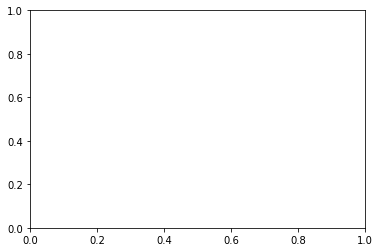

In [119]:
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])

In [120]:
A2_A3_A4.Datetime.astype('O')

1       2019-03-11 10:59:00
2       2019-03-11 11:00:00
3       2019-03-11 11:01:00
4       2019-03-11 11:02:00
5       2019-03-11 11:03:00
6       2019-03-11 11:04:00
7       2019-03-11 11:05:00
8       2019-03-11 11:06:00
9       2019-03-11 11:07:00
10      2019-03-11 11:08:00
11      2019-03-11 11:09:00
12      2019-03-11 11:10:00
13      2019-03-11 11:11:00
14      2019-03-11 11:12:00
15      2019-03-11 11:13:00
16      2019-03-11 11:14:00
17      2019-03-11 11:15:00
18      2019-03-11 11:16:00
19      2019-03-11 11:17:00
20      2019-03-11 11:18:00
21      2019-03-11 11:19:00
22      2019-03-11 11:20:00
23      2019-03-11 11:21:00
24      2019-03-11 11:22:00
3242    2019-03-11 11:58:00
3243    2019-03-11 11:59:00
3244    2019-03-11 12:18:00
3245    2019-03-11 12:19:00
3246    2019-03-11 12:20:00
3247    2019-03-11 12:21:00
               ...         
3206    2019-03-21 14:09:00
3207    2019-03-21 14:10:00
3208    2019-03-21 14:11:00
3209    2019-03-21 14:12:00
3210    2019-03-21 1

In [121]:
ax.plot(A2_A3_A4.Datetime.astype('O') ,A2_A3_A4.A2_PM10, color='r', label = 'A2')
ax.plot(A2_A3_A4.Datetime.astype('O') ,A2_A3_A4.A3_PM10, color='g',label = 'A3')
ax.plot(A2_A3_A4.Datetime.astype('O') ,A2_A3_A4.A4_PM10, color='b',label = 'A4')


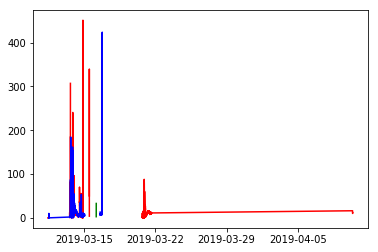

In [122]:
fig

In [123]:
fig.savefig('A2A3A4.png')

## Other sensors which have calibration

In [8]:
Arduino6 = pd.read_csv("After Calibration/cr_sensor_6_calib.txt",delimiter=',',
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','Temp', 'Pressure', 'Humidity', 'VOC'
                              ,'SO2_1','SO2_2','NO2_1','NO2_2'])

In [16]:
Arduino6

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2,Datetime
0,2019,3,11,13,27,3,22.15,1026.28,24.42,0.00,32767.00,32767.00,-3887.0,-4567.00,2019-03-11 13:27:03
1,2019,3,11,13,27,8,22.16,1026.26,24.28,6.14,32767.00,32767.00,-2194.0,-4298.00,2019-03-11 13:27:08
2,2019,3,11,13,27,13,22.18,1026.26,24.07,8.81,32767.00,32767.00,-1972.0,-3881.00,2019-03-11 13:27:13
3,2019,3,11,13,27,18,22.20,1026.26,23.87,11.67,32767.00,32767.00,-1877.0,-3160.00,2019-03-11 13:27:18
4,2019,3,11,13,27,23,22.22,1026.28,23.77,14.51,32767.00,32767.00,-1816.0,-2666.00,2019-03-11 13:27:23
5,2019,3,11,13,27,28,22.23,1026.28,23.84,17.64,32767.00,32767.00,-1775.0,-2255.00,2019-03-11 13:27:28
6,2019,3,11,13,27,33,22.25,1026.28,23.84,20.84,32767.00,32767.00,-2079.0,-4498.00,2019-03-11 13:27:33
7,2019,3,11,13,27,38,22.27,1026.30,23.82,23.95,24157.00,32767.00,-2009.0,-4256.00,2019-03-11 13:27:38
8,2019,3,11,13,27,43,22.28,1026.28,23.80,26.96,13932.00,32767.00,-1956.0,-3991.00,2019-03-11 13:27:43
9,2019,3,11,13,27,48,22.30,1026.30,23.67,30.21,7423.00,32767.00,-1906.0,-3748.00,2019-03-11 13:27:48


In [15]:
Arduino6['Datetime']  = (pd.to_datetime(Arduino6['Year'].astype(str) + '-' +
                                  Arduino6['Month'].astype(str) + '-' +
                                  Arduino6['Day'].astype(str) + ' ' +
                                  Arduino6['Hour'].astype(str)+ ':'+
                                        Arduino6['Minute'].astype(str) +':'+
                                        Arduino6['Seconds'].astype(str)))

In [ ]:
#Aux V = SO2_1
# Use the offset value which is found through the calibration of the
# arduino at the monitoring site Bruce said that this was 0.26 from 
#looking at the data but doesn't make sense as how do i include 
#data from marylebone actual equipment?!

Arduino6['aux-off V'] = ['SO2_1'- offset]

In [ ]:
#Create a new variable for the voltage reading. Calculate the variable 
#through subtracting the adjusted baseline value from the measurement value

Arduino6['V reading'] = ['SO2_2'- 'aux-off V']

In [ ]:
#Convert the voltage reading into ppb using the WE sensitivity values 
#provided by the manufacturer, in this case it's 0.3
#Arduino6['ppb'] = ['V reading'*1000/ sensitivity]

Arduino6['ppb'] = ['V reading'*1000/ 0.3]

In [10]:
# Calculate the offset using the calibration data 
# Subset the data into costa rica and calibration 
A6_Costa = Arduino6[Arduino6.Month <4]
A6_Calib = Arduino6[Arduino6.Month == 4]


In [11]:
A6_Calib

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2
29967,2019,4,10,9,57,51,14.06,1017.46,44.21,0.00,2.05,2.05,1.43,1.32
29968,2019,4,10,9,57,56,13.97,1017.44,44.32,5.86,2.05,2.05,0.99,0.73
29969,2019,4,10,9,58,1,13.86,1017.40,44.28,7.50,2.05,2.05,0.74,0.52
29970,2019,4,10,9,58,6,13.75,1017.38,44.48,9.53,2.05,2.05,0.60,0.44
29971,2019,4,10,9,58,12,13.65,1017.34,44.70,11.68,2.05,2.05,0.51,0.41
29972,2019,4,10,9,58,17,13.53,1017.34,44.88,13.95,2.05,2.05,0.46,0.39
29973,2019,4,10,9,58,22,13.41,1017.34,45.02,16.31,2.05,2.05,0.43,0.38
29974,2019,4,10,9,58,27,13.28,1017.32,45.15,18.87,2.05,2.05,0.41,0.38
29975,2019,4,10,9,58,32,13.14,1017.32,45.37,21.43,2.05,2.05,0.40,0.38
29976,2019,4,10,9,58,37,13.00,1017.26,45.77,24.19,2.05,2.05,0.39,0.38


In [12]:
A6_Costa

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2
0,2019,3,11,13,27,3,22.15,1026.28,24.42,0.00,32767.00,32767.00,-3887.00,-4567.00
1,2019,3,11,13,27,8,22.16,1026.26,24.28,6.14,32767.00,32767.00,-2194.00,-4298.00
2,2019,3,11,13,27,13,22.18,1026.26,24.07,8.81,32767.00,32767.00,-1972.00,-3881.00
3,2019,3,11,13,27,18,22.20,1026.26,23.87,11.67,32767.00,32767.00,-1877.00,-3160.00
4,2019,3,11,13,27,23,22.22,1026.28,23.77,14.51,32767.00,32767.00,-1816.00,-2666.00
5,2019,3,11,13,27,28,22.23,1026.28,23.84,17.64,32767.00,32767.00,-1775.00,-2255.00
6,2019,3,11,13,27,33,22.25,1026.28,23.84,20.84,32767.00,32767.00,-2079.00,-4498.00
7,2019,3,11,13,27,38,22.27,1026.30,23.82,23.95,24157.00,32767.00,-2009.00,-4256.00
8,2019,3,11,13,27,43,22.28,1026.28,23.80,26.96,13932.00,32767.00,-1956.00,-3991.00
9,2019,3,11,13,27,48,22.30,1026.30,23.67,30.21,7423.00,32767.00,-1906.00,-3748.00


In [ ]:
# Plot data
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])
ax.plot(Arduino6.Datetime.astype('O') ,Arduino6.ppb, color='b',label = 'SO2')


In [5]:
Arduino6.to_csv('Ard6.csv')

In [20]:
Arduino9 = pd.read_csv("After Calibration/cr_sensor_9_calib.txt",delimiter=',',
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','CO2','?'])

In [21]:
Arduino9

,Year,Month,Day,Hour,Minute,Seconds,CO2,?
0,2019,3,11,15,4,30,0.61,648.44
1,2019,3,11,15,4,35,0.61,657.42
2,2019,3,11,15,4,40,0.61,651.56
3,2019,3,11,15,4,45,0.61,659.96
4,2019,3,11,15,4,50,0.62,673.44
5,2019,3,11,15,4,57,0.62,691.41
6,2019,3,11,15,5,2,0.62,698.44
7,2019,3,11,15,5,11,0.62,690.63
8,2019,3,13,13,9,46,1.23,2602.93
9,2019,3,13,13,9,51,1.33,2920.12


In [7]:
Arduino10 = pd.read_csv("After Calibration/cr_sensor_10_calib.txt",delimiter=',',
                        names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','CO_1','CO_2','NO2_1','NO2_2'])

In [23]:
Arduino10

,Year,Month,Day,Hour,Minute,Seconds,V0,V1,V2,V3
0,2019,11,3,15,14,29,0.27,0.28,0.29,0.29
1,2019,11,3,15,14,34,0.27,0.28,0.29,0.30
2,1900,1,1,0,0,7,0.04,0.28,0.04,0.00
3,1900,1,1,0,0,12,0.04,0.28,0.04,-0.00
4,1900,1,1,0,0,6,0.04,0.28,0.04,-0.00
5,1900,1,1,0,0,11,0.04,0.28,0.04,-0.00
6,1900,1,1,0,0,16,0.04,0.28,0.15,0.08
7,1900,1,1,0,0,21,0.04,0.28,0.20,0.10
8,1900,1,1,0,0,26,0.04,0.28,0.22,0.17
9,1900,1,1,0,0,31,0.04,0.28,0.24,0.18
